In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches
from scipy.spatial import ConvexHull
import seaborn as sns

In [2]:
spdata = pd.read_pickle('SP.pkl')
mpdata = pd.read_pickle('MP.pkl')

In [4]:
mpdata.columns

Index(['Patient ID', 'Record number recode',
       'Site recode B ICD-O-3/WHO 2008 (Event Variable)', 'Year of diagnosis',
       'Race recode (W, B, AI, API)', 'Site recode ICD-O-3/WHO 2008',
       'Age recode with <1 year olds', 'Age at diagnosis',
       'Primary Site - labeled', 'Histologic Type ICD-O-3', 'Grade',
       'Laterality', 'Derived AJCC Stage Group, 7th ed (2010-2015)',
       'Derived AJCC T, 7th ed (2010-2015)',
       'Derived AJCC N, 7th ed (2010-2015)',
       'Derived AJCC M, 7th ed (2010-2015)',
       'Derived SEER Cmb Stg Grp (2016+)', 'Derived SEER Combined T (2016+)',
       'Derived SEER Combined N (2016+)', 'Derived SEER Combined M (2016+)',
       'RX Summ--Surg Prim Site (1998+)', 'Radiation sequence with surgery',
       'Radiation recode', 'Chemotherapy recode (yes, no/unk)',
       'Tumor Size Summary (2016+)', 'CS tumor size (2004-2015)',
       'SEER Combined Mets at DX-bone (2010+)',
       'SEER Combined Mets at DX-brain (2010+)',
       'SEER Co

In [3]:
mpdata

,Patient ID,Record number recode,Site recode B ICD-O-3/WHO 2008 (Event Variable),Year of diagnosis,"Race recode (W, B, AI, API)",Site recode ICD-O-3/WHO 2008,Age recode with <1 year olds,Age at diagnosis,Primary Site - labeled,Histologic Type ICD-O-3,...,Vital status recode (study cutoff used),Month of diagnosis recode,Month of follow-up recode,Year of follow-up recode,Event Number,Reason for Exit,Sequence Number (Calculated),Age at Event in Months (Calculated),Months Since Index (Calculated),Person Time Years (Calculated)
0,3976105,1,Female Breast,2014,White,Breast,70-74 years,74,"C50.9-Breast, NOS",8500,...,Alive,December,December,2016,Index Record,NaN,1,,,
1,3976105,2,Melanoma of the Skin,2016,White,Melanoma of the Skin,75-79 years,75,C44.6-Skin of upper limb and shoulder,8720,...,Alive,April,December,2016,1,End of Study,2,905,16,1.55
2,3984697,1,Female Breast,2010,White,Breast,60-64 years,64,C50.4-Upper-outer quadrant of breast,8500,...,Alive,January,December,2016,Index Record,NaN,1,,,
3,3984697,2,Lung and Bronchus,2015,White,Lung and Bronchus,70-74 years,70,"C34.3-Lower lobe, lung",8480,...,Alive,June,December,2016,1,End of Study,2,842,65,6.46
4,3984714,1,Female Breast,2010,White,Breast,65-69 years,67,C50.2-Upper-inner quadrant of breast,8500,...,Alive,January,December,2016,Index Record,NaN,1,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16571,77731532,2,NHL - Nodal,2016,White,NHL - Nodal,75-79 years,76,C77.3-Lymph nodes of axilla or arm,9823,...,Alive,August,December,2016,1,End of Study,2,921,22,1.71
16572,77738727,1,Female Breast,2015,Black,Breast,40-44 years,44,"C50.9-Breast, NOS",8500,...,Dead,August,December,2016,Index Record,NaN,1,,,
16573,77738727,2,Rectum,2016,Black,Rectum,45-49 years,45,"C20.9-Rectum, NOS",8070,...,Dead,July,December,2016,1,Death,2,550,11,0.83
16574,77785763,1,Female Breast,2014,White,Breast,75-79 years,75,C50.4-Upper-outer quadrant of breast,8480,...,Dead,December,October,2016,Index Record,NaN,1,,,


In [8]:
mpdata.iloc[1]

Patient ID                                                                                  3976105
Record number recode                                                                              2
Site recode B ICD-O-3/WHO 2008 (Event Variable)                                Melanoma of the Skin
Year of diagnosis                                                                              2016
Race recode (W, B, AI, API)                                                                   White
Site recode ICD-O-3/WHO 2008                                                   Melanoma of the Skin
Age recode with <1 year olds                                                            75-79 years
Age at diagnosis                                                                                 75
Primary Site - labeled                                        C44.6-Skin of upper limb and shoulder
Histologic Type ICD-O-3                                                                        8720


In [7]:
mpdata.iloc[0]

Patient ID                                                                       3976105
Record number recode                                                                   1
Site recode B ICD-O-3/WHO 2008 (Event Variable)                            Female Breast
Year of diagnosis                                                                   2014
Race recode (W, B, AI, API)                                                        White
Site recode ICD-O-3/WHO 2008                                                      Breast
Age recode with <1 year olds                                                 70-74 years
Age at diagnosis                                                                      74
Primary Site - labeled                                                 C50.9-Breast, NOS
Histologic Type ICD-O-3                                                             8500
Grade                                                   Poorly differentiated; Grade III
Laterality           

1. Time Feature in mpdata

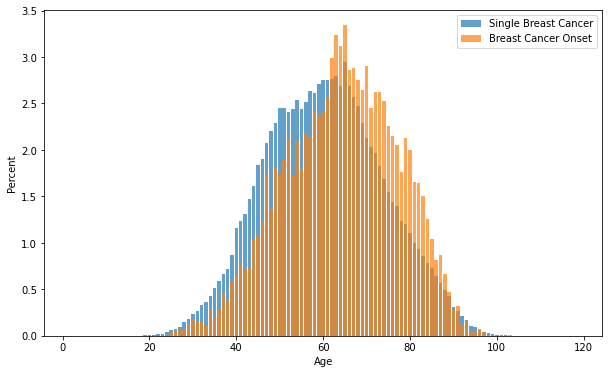

In [17]:
# 发病年龄散点图

sp_age = spdata.groupby('Age at diagnosis').size()/spdata.shape[0]*100
mp_age = mpdata[mpdata['Record number recode']==1].groupby('Age at diagnosis').size()/mpdata[mpdata['Record number recode']==1].shape[0]*100
op_age = mpdata[mpdata['Record number recode']==2].groupby('Age at diagnosis').size()/mpdata[mpdata['Record number recode']==2].shape[0]*100

plt.figure(figsize=(10, 6))
plt.bar(sp_age.index, sp_age.values, label='Single Breast Cancer', alpha=0.7);
plt.bar(mp_age.index, mp_age.values, label='Breast Cancer Onset', alpha=0.7);
# plt.bar(op_age.index, op_age.values, label='Other Cancer', alpha=0.4);
plt.xlabel('Age')
plt.ylabel('Percent')
plt.legend();
plt.show()

In [18]:
def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

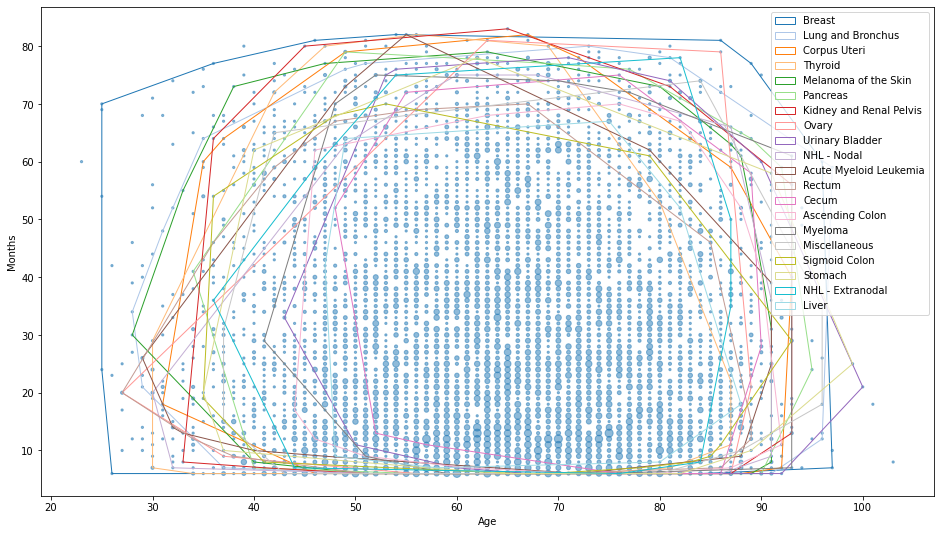

In [29]:
# 不同年龄患乳腺癌后继发其他癌的时间

timedata = pd.DataFrame()
timedata['Age at diagnosis'] = mpdata[mpdata['Record number recode']==1]['Age at diagnosis'].values
timedata['Months Since Index (Calculated)'] = mpdata[mpdata['Record number recode']==2]['Months Since Index (Calculated)'].values
timedata['Site recode ICD-O-3/WHO 2008'] = mpdata[mpdata['Record number recode']==2]['Site recode ICD-O-3/WHO 2008'].values

count = timedata.groupby(['Age at diagnosis','Months Since Index (Calculated)']).size()
top10cat = timedata.groupby('Site recode ICD-O-3/WHO 2008').size().sort_values(ascending=False).head(20)

plt.figure(figsize=(16,9))
plt.xlabel('Age')
plt.ylabel('Months')
x = [ i[0] for i in count.index ]
y = [ i[1] for i in count.index ]
size = [ i*5 for i in count.values ]

plt.scatter(x, y, s=size, alpha=0.5)

for i, item in enumerate(top10cat.index):
    catframe = timedata[timedata['Site recode ICD-O-3/WHO 2008']==item]
    encircle(catframe['Age at diagnosis'],catframe['Months Since Index (Calculated)'], alpha=1, fc='none',ec=plt.cm.tab20(i), label=item)
plt.legend()
plt.show()

In [20]:
count

Age at diagnosis  Months Since Index (Calculated)
23                60                                 1
25                24                                 1
                  54                                 1
                  69                                 1
                  70                                 1
                                                    ..
97                59                                 1
99                25                                 1
100               21                                 1
101               18                                 1
103               8                                  1
Length: 3095, dtype: int64

In [21]:
tips = sns.load_dataset('tips')

In [22]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


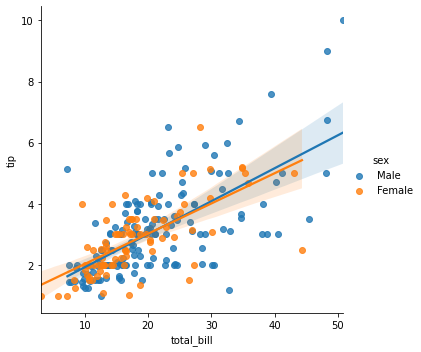

In [25]:
sns.lmplot(x="total_bill", y="tip", data=tips, hue='sex')